# Case Study Quantium Retail Strategy and Analytics

<p> Quantium has had a data partnership with a large supermarket brand for the last few years who provide transactional and customer data. <br>
    Data analysis will be done to provide data analysis and insights to help the company make strategic decisions.</p>

In [1]:
#importando as bibliotecas que serão utilizadas ao longo da análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory data analysis

The first step in any analysis is to first understand the data. Let's take a look at each of the datasets provided.

### Examining transaction data

We can use 'dtypes' to look at the format of each column and see a sample of the data. As we have read in the dataset as a 'data.table' object, we can also run 'transactionData' in the console to see a sample of the data or use 'head(10)' to look at the first 10 rows.

In [2]:
df = pd.read_csv('QVI_transaction_data.csv')

In [3]:
df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
#quantidade de colunas e linhas
df.shape

(264836, 8)

In [5]:
#Tipo de dados
df.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

As we are only interested in words that will tell us if the product is chips or not, let’s remove all words with digits and special characters such as ‘&’ from our set of product words

In [6]:
def cleaning(df):
    
    df1 = df.copy()
    #Passando as data do excel para pandas
    df1['DATE'] = pd.to_datetime(df['DATE'], unit='D', origin='1899-12-30')
    
    #fazendo uma limpeza nos dados retirando npumeros e caracteres especiais
    df1['PROD_SIZE'] = df1['PROD_NAME'].str.replace('\D*', '').astype(str).astype(int)
    df1['PROD_NAME'] = df1['PROD_NAME'].str.replace('\d*', '').str.replace('&', ' ').str.replace('S/', ' ').str.replace('/', ' ')
    df1['PROD_NAME'] = df1['PROD_NAME'].str.extract(r'^(.*).', expand=False)
    return df1

In [7]:
df1 = cleaning(df)
df1.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,210
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream Chives,2,7.2,210


In [8]:
#Contando o maior número de palavras vemos que existe produtos de Salsa que não será utilizado
df1['PROD_NAME'].str.split(expand=True).stack().value_counts().head(20)

Chips       49770
Kettle      41288
Smiths      28860
Cheese      27890
Pringles    25102
Doritos     24962
Salt        24719
Crinkle     23960
Corn        22063
Original    21560
Cut         20754
Chip        18645
Chicken     18577
Salsa       18094
Cream       16926
Chilli      15390
Sea         14145
Thins       14075
Sour        13882
Crisps      12607
dtype: int64

There are salsa products in the dataset but we are only interested in the chips category, so let’s remove these.

In [9]:
#Eliminando os produtos de Salsa
df1['PROD_NAME'] = df1['PROD_NAME'].str.lower()
df1 = df1[~df1['PROD_NAME'].str.contains('salsa')]
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,smiths chip thinly cream onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny jlpno chili,3,13.8,150


Next, we can use describe() to check summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data and if there are any nulls in any of the columns

In [10]:
#Vsializando a descrição dos dados para descobrir se existe dados null e outliers
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_SIZE
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,175.585178
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,59.434727
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


There are no nulls in the columns but product quantity appers to have an outlier which we should investigate further. Let's investigate further the case where 200 packets of chips are bought in one transactions

In [11]:
df1[df1['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme,200,650.0,380


<p> There are two transactions where 200 packets of chips are bought in one transactions and both of these transactions were by the same customer. <br>
Let's see if the costomer has had other transactions </p>

In [12]:
df1[df1['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme,200,650.0,380


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [13]:
df1 = df1[df1['LYLTY_CARD_NBR'] != 226000]
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_SIZE
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


That's better. Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [14]:
#Contando o número de transações por data
transaction_data = df1['DATE'].value_counts()
transaction_data

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: DATE, Length: 364, dtype: int64

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

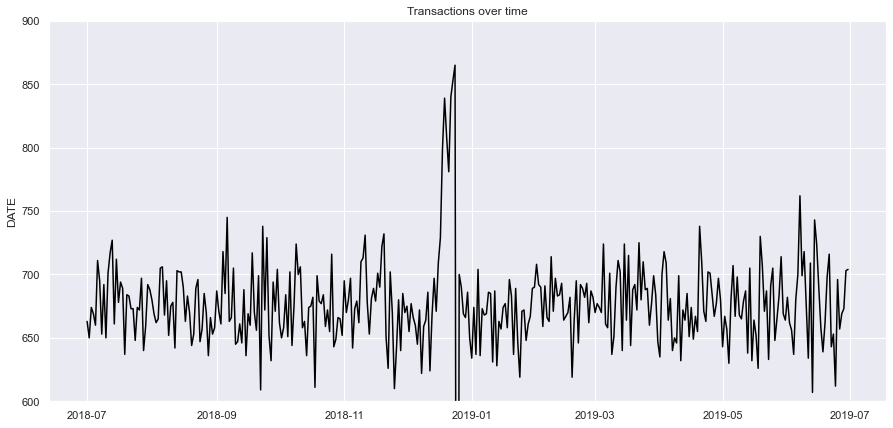

In [15]:
df1 = df1.append({'DATE':'2018-12-25'}, ignore_index = True)
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.lineplot(data=df1['DATE'].value_counts(), color='black').set_title("Transactions over time")
#ax.set(xlabel='Day', ylabel='Number of transactions')
plt.ylim(600, 900)
plt.show()

(array(17866.), array(17896.))

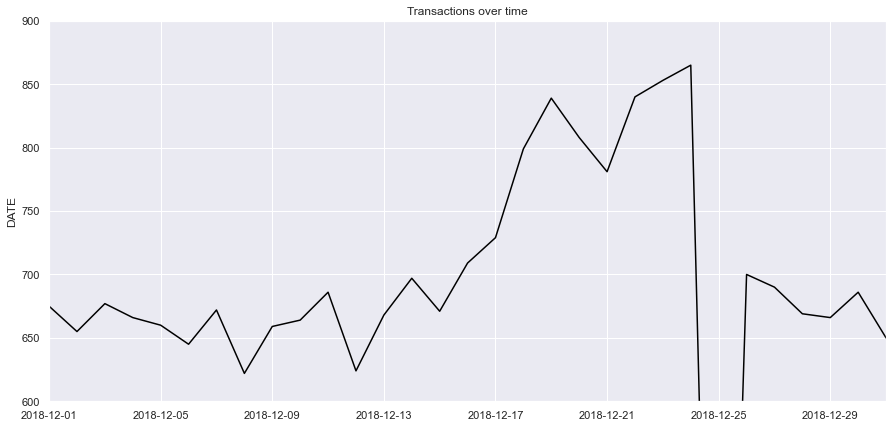

In [16]:
sns.lineplot(data=df1['DATE'].value_counts(), color='black').set_title("Transactions over time")
#ax.set(xticks=df['DATE'])
plt.ylim(600, 900)
plt.xlim('2018-12-01', '2018-12-31')

<p>We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.<br>

Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will start with pack size.</p>

In [17]:
df1['PROD_SIZE'].sort_values()

38011      70.0
39568      70.0
164172     70.0
211712     70.0
39529      70.0
          ...  
238307    380.0
217744    380.0
122549    380.0
95366     380.0
246740      NaN
Name: PROD_SIZE, Length: 246741, dtype: float64

<p>The largest size is 380g and the smallest size is 70g - seems sensible!<br>

Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric.</p>

Text(0.5, 1.0, 'Histogram of transactionData')

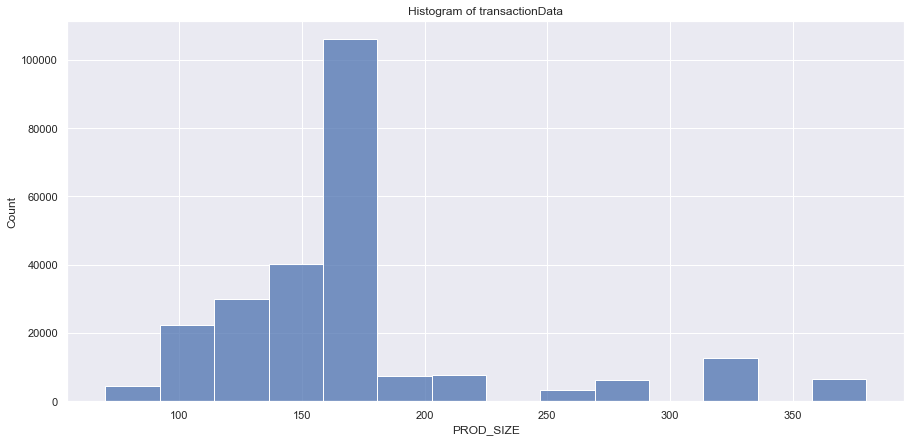

In [18]:
sns.histplot(data=df1['PROD_SIZE'], bins=14).set_title("Histogram of transactionData")

# Examining customer data
Now that we are happy with the transaction dataset, let's have a look at the customer dataset.

In [19]:
df2 = pd.read_csv('QVI_purchase_behaviour.csv')
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [20]:
result = df1.merge(df2, on='LYLTY_CARD_NBR', how='left')
result2 = df.merge(df2, on='LYLTY_CARD_NBR', how='left')
print(result.shape)
result.head()

(246741, 11)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17 00:00:00,1.0,1000.0,1.0,5.0,natural chip compny seasalt,2.0,6.0,175.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14 00:00:00,1.0,1307.0,348.0,66.0,ccs nacho cheese,3.0,6.3,175.0,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20 00:00:00,1.0,1343.0,383.0,61.0,smiths crinkle cut chips chicken,2.0,2.9,170.0,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17 00:00:00,2.0,2373.0,974.0,69.0,smiths chip thinly cream onion,5.0,15.0,175.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18 00:00:00,2.0,2426.0,1038.0,108.0,kettle tortilla chpshny jlpno chili,3.0,13.8,150.0,MIDAGE SINGLES/COUPLES,Budget


<p>As the number of rows in 'result' is the same as that of 'transactionData', we can be sure that no duplicates were created. This is because we created 'result' by setting with a left join which means take all the rows in 'transactionData' and find rows with matching values in shared columns and then joining the details in these rows to the 'x' or the first mentioned table. <br>

Let's also check if some customers were not matched on by checking for nulls.</p>

In [21]:
result.isnull().values.any()

True

<p>Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset. <br>
    
Let's know save this data. </p>

In [22]:
result.to_csv('data.csv')

## Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.

In [23]:
df3 = pd.read_csv('data.csv')
sales=df3[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()
sales

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           MIDAGE SINGLES/COUPLES   33345.70
                 NEW FAMILIES             20607.45
                 OLDER FAMILIES          156863.75
                 OLDER SINGLES/COUPLES   127833.60
                 RETIREES                105916.30
                 YOUNG FAMILIES          129717.95
                 YOUNG SINGLES/COUPLES    57122.10
Mainstream       MIDAGE SINGLES/COUPLES   84734.25
                 NEW FAMILIES             15979.70
                 OLDER FAMILIES           96413.55
                 OLDER SINGLES/COUPLES   124648.50
                 RETIREES                145168.95
                 YOUNG FAMILIES           86338.25
                 YOUNG SINGLES/COUPLES   147582.20
Premium          MIDAGE SINGLES/COUPLES   54443.85
                 NEW FAMILIES             10760.80
                 OLDER FAMILIES           75242.60
                 OLDER SINGLES/COUPLES   123537.55
                 RETIREES                 91296.65
                 YOUNG FAMILIES           78571.70
                 YOUNG SINGLES/COUPLES    39052.30

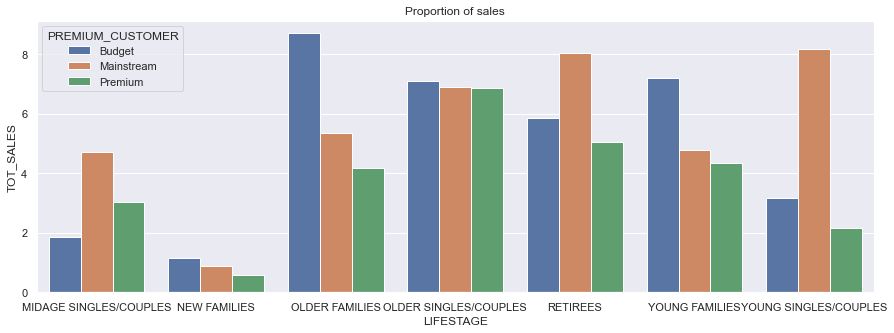

In [24]:
sns.set(rc={'figure.figsize':(15,5)})
y=100*sales.reset_index()['TOT_SALES']/sales['TOT_SALES'].sum()
x=sales.reset_index()['LIFESTAGE']
hue=sales.reset_index()['PREMIUM_CUSTOMER']
g=sns.barplot(x=x, y=y,hue=hue, data=sales).set_title("Proportion of sales")

<p>Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees<br>

Let's see if the higher sales are due to there being more customers who buy chips. </p>

In [25]:
# How many customers are in each segment
costumers=result2[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()
costumers

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           MIDAGE SINGLES/COUPLES   35514.80
                 NEW FAMILIES             21928.45
                 OLDER FAMILIES          168363.25
                 OLDER SINGLES/COUPLES   136769.80
                 RETIREES                113147.80
                 YOUNG FAMILIES          139345.85
                 YOUNG SINGLES/COUPLES    61141.60
Mainstream       MIDAGE SINGLES/COUPLES   90803.85
                 NEW FAMILIES             17013.90
                 OLDER FAMILIES          103445.55
                 OLDER SINGLES/COUPLES   133393.80
                 RETIREES                155677.05
                 YOUNG FAMILIES           92788.75
                 YOUNG SINGLES/COUPLES   157621.60
Premium          MIDAGE SINGLES/COUPLES   58432.65
                 NEW FAMILIES             11491.10
                 OLDER FAMILIES           81958.40
                 OLDER SINGLES/COUPLES   132263.15
                 RETIREES                 97646.05
                 YOUNG FAMILIES           84025.50
                 YOUNG SINGLES/COUPLES    41642.10

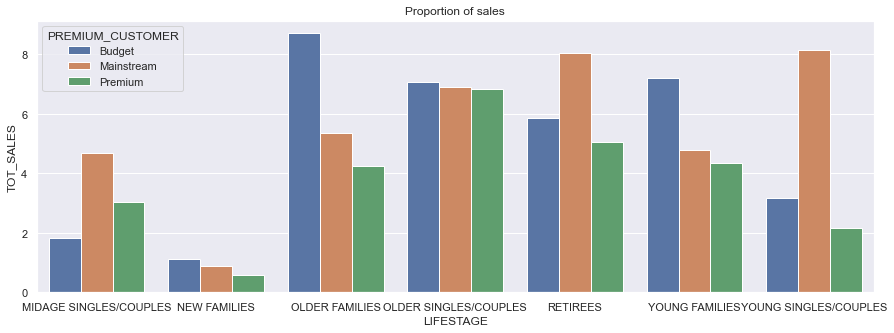

In [26]:
y=100*costumers.reset_index()['TOT_SALES']/costumers['TOT_SALES'].sum()
x=costumers.reset_index()['LIFESTAGE']
hue=costumers.reset_index()['PREMIUM_CUSTOMER']
g=sns.barplot(x=x, y=y,hue=hue, data=costumers).set_title("Proportion of sales")

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer.

Let’s have a look at this next.

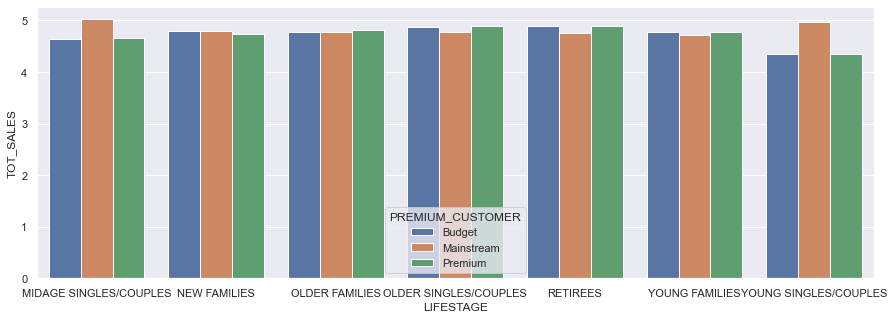

In [31]:
#Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
costumers=result2[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).mean()
y=100*costumers.reset_index()['TOT_SALES']/costumers['TOT_SALES'].sum()
x=costumers.reset_index()['LIFESTAGE']
hue=costumers.reset_index()['PREMIUM_CUSTOMER']
g=sns.barplot(x=x, y=y,hue=hue, data=costumers)

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [28]:
#Realize um teste t independente entre jovens solteiros e casais convencionais vs premium e de orçamento médio
from scipy.stats import ttest_ind

mainstream = df3['PREMIUM_CUSTOMER'] == 'Mainstream'
young_midage = (df3["LIFESTAGE"] == 'MIDAGE SINGLES/COUPLES') | (df3['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')

budget_premium = (df3['PREMIUM_CUSTOMER'] == 'Budget') | (df3['PREMIUM_CUSTOMER'] == 'Premium')

a = df3[young_midage & mainstream]['TOT_SALES']
b = df3[young_midage & budget_premium]['TOT_SALES']
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.834645908180742e-237


True

The t-test results in amost 0, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

## Deep dive into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into. We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

In [29]:
midage=df3[(df3['PREMIUM_CUSTOMER']=='Mainstream') & (df3['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')]
young=df3[(df3['PREMIUM_CUSTOMER']=='Mainstream') & (df3['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
print(f"MIDAGE SINGLES/COUPLES\n{midage['PROD_NAME'].value_counts().head(5)}")
print(f"YOUNG SINGLES/COUPLES\n{young['PROD_NAME'].value_counts().head(5)}")

MIDAGE SINGLES/COUPLES
smiths crinkle chips salt   vinegar     194
cheezels cheese                         186
doritos corn chips  nacho cheese        179
kettle chilli                           179
cobs popd sour crm   chives chips       176
Name: PROD_NAME, dtype: int64
YOUNG SINGLES/COUPLES
tostitos splash of  lime                335
kettle mozzarella   basil   pesto       332
doritos corn chips  cheese supreme      326
kettle tortilla chpshny jlpno chili     323
smiths crnkle chip  orgnl big bag       323
Name: PROD_NAME, dtype: int64


We can see that :
- Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population
- Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population

Let’s also find out if our target segment tends to buy larger packs of chips.

In [30]:
print(f"MIDAGE SINGLES/COUPLES\n{midage['PROD_SIZE'].value_counts().head(5)}")
print(f"YOUNG SINGLES/COUPLES\n{young['PROD_SIZE'].value_counts().head(5)}")

MIDAGE SINGLES/COUPLES
175.0    2975
150.0    1777
134.0    1159
110.0    1124
170.0     882
Name: PROD_SIZE, dtype: int64
YOUNG SINGLES/COUPLES
175.0    4997
150.0    3080
134.0    2315
110.0    2051
170.0    1575
Name: PROD_SIZE, dtype: int64


Both the segment buy 175g, 150g and 134g packets mostly

## Conclusion

<p>Let’s recap what we’ve found!<br>
    
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour. <br>
    
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.<br>
    
Quantium can help the Category Manager with recommendations of where these segments are and further help them with measuring the impact of the changed placement. We’ll work on measuring the impact of trials in the next task and putting all these together in the third task.</p>